In [3]:
from __future__ import annotations

import json
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from modelbase.ode import Simulator
from matplotlib.colors import TwoSlopeNorm
from modelbase.ode import mca
from modelbase.typing import Figure
from modelbase.utils.plotting import heatmap_from_dataframe
from models import get_model


def get_new_y0(s):
    return dict(s.get_results_df().iloc[-1])


#def test_versions():
#    from platform import python_version
#
#    from packaging.version import Version
#    from pkg_resources import get_distribution
#
#    def assert_same(package: str, actual: Version, expected: Version) -> None:
#        if not actual >= expected:
#            raise ValueError(f"Expected {package} version >={expected}, got {actual}")
#
#    assert_same("Python", Version(python_version()), Version("3.10.0"))
#    assert_same("modelbase", Version(get_distribution("modelbase").version), Version("1.24.0"))


#test_versions()

RES_DIR = Path("results")

with open(RES_DIR / "y0_by_pfd.json", "r") as fp:
    y0s: dict[int, dict[str, float]] = {int(k): v for k, v in json.load(fp).items()}

PARS = {
    "PSIItot": "PS2",
    "PSItot": "PS1",
    "kCytb6f": r"b$_6$f",
    "kcyc": "PGR5",
    "kMehler": "Mehler",
    "V1_base": "RuBisCO",
    "V6_base": "FBPase",
    "V9_base": "SBPase",
    "kcatMDAR": "MDAR",
    "kcat_DHAR": "DHAR",
}

RXNS = {
    "vPS2": "PS2",
    "vPS1": "PS1",
    "vB6f": r"b$_6$f",
    "vMehler": "Mehler",
    "vCyc": "CEF",
    "vRuBisCO": "RuBisCO",
    "vFBPase": "FBPase",
    "v9": "SBPase",
    "vMDAreduct": "MDAR",
    "vDHAR": "DHAR",
}

CPDS = {
    "PQ_redoxstate": r"PQ$_\mathrm{red}$",
    "Fd_redoxstate": r"Fd$_\mathrm{red}$",
    "PC_redoxstate": r"PC$_\mathrm{red}$",
    "NADP_redoxstate": "NADPH",
    "ATP_norm": "ATP",
    "RUBP": "RUBP",
    "PGA": "PGA",
    "FBP": "FBP",
    "SBP": "SBP",
}

y0 = {
    "PQ": 11.027139850905353,
    "PC": 1.8895071932002812,
    "Fd": 3.8690237263896705,
    "ATP": 1.620195002854852,
    "NADPH": 0.4882103700673736,
    "H": 0.0022147075094596015,
    "LHC": 0.8023074419510501,
    "Psbs": 0.9607146039898598,
    "Vx": 0.950783616933656,
    "PGA": 0.9913970817549008,
    "BPGA": 0.0005355311557548053,
    "GAP": 0.0062630116252017295,
    "DHAP": 0.13778623933075737,
    "FBP": 0.006126990841013743,
    "F6P": 0.31166103888161867,
    "G6P": 0.7168203893211117,
    "G1P": 0.041575582577936025,
    "SBP": 0.01311315151803723,
    "S7P": 0.15782894767619207,
    "E4P": 0.00732079113061801,
    "X5P": 0.022396849486562384,
    "R5P": 0.03751472214765548,
    "RUBP": 0.13153657267999222,
    "RU5P": 0.015005888732707041,
    "MDA": 5.85270097771621e-06,
    "ASC": 9.999994138785292,
    "H2O2": 3.4273920330125316e-06,
    "DHA": 8.513863740903352e-09,
    "GSH": 9.999999991725186,
    "GSSG": 4.137406632226743e-09,
    "TR_ox": 0.9,
    "E_inactive": 4.7368421052631575,
}

In [4]:
from models import get_model

In [5]:
m= get_model()
s= Simulator(m)
s.initialise(y0)
x= s.parameter_scan("pfd", np.linspace(50,1000,20))

pfd:   0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
def plot_all_heatmaps(
    c1: pd.DataFrame,
    f1: pd.DataFrame,
    c2: pd.DataFrame,
    f2: pd.DataFrame,
    co2: float,
    low_light: float,
    high_light: float,
) -> Figure:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.text(0, 1, f"CO2 = {co2} mM", fontsize=16, ha="left")
    fig.text(0.5, 1, f"PPFD = {low_light} " r"$\mathrm{µmol\ m^{-2}\ s^{-1}}$", fontsize=16, ha="center")
    mca.plot_coefficient_heatmap(
        f1,
        title="Flux Control Coefficient",
        rows=list(RXNS),
        annotate=False,
        ax=ax1,
        norm=TwoSlopeNorm(0),
    )
    mca.plot_coefficient_heatmap(
        c1,
        title="Concentration Control Coefficient",
        rows=list(CPDS),
        annotate=False,
        ax=ax2,
        norm=TwoSlopeNorm(0),
    )

    fig.text(0.5, 0.5, f"PPFD = {high_light} " r"$\mathrm{µmol\ m^{-2}\ s^{-1}}$", fontsize=16, ha="center")
    mca.plot_coefficient_heatmap(
        f2,
        title="",
        rows=list(RXNS),
        annotate=False,
        ax=ax3,
        norm=TwoSlopeNorm(0),
    )
    mca.plot_coefficient_heatmap(
        c2,
        title="",
        rows=list(CPDS),
        annotate=False,
        ax=ax4,
        norm=TwoSlopeNorm(0),
    )
    ax1.set_xticklabels(PARS.values(), rotation=90)
    ax1.set_yticklabels(RXNS.values())
    ax2.set_xticklabels(PARS.values(), rotation=90)
    ax2.set_yticklabels(CPDS.values())
    ax3.set_xticklabels(PARS.values(), rotation=90)
    ax3.set_yticklabels(RXNS.values())
    ax4.set_xticklabels(PARS.values(), rotation=90)
    ax4.set_yticklabels(CPDS.values())
    fig.tight_layout(h_pad=4)
    return fig


# Compare conditions

- Low / high CO2
- Low / high light

In [17]:
LOW_CO2 = 0.005
HIGH_CO2 = 2

LOW_LIGHT = 100
HIGH_LIGHT = 1000

In [6]:
m = get_model()
m.update_parameter("CO2", LOW_CO2)
m.update_parameter("pfd", LOW_LIGHT)
cll, fll = mca.get_response_coefficients_df(m, list(PARS), y0s[LOW_LIGHT])
m.update_parameter("pfd", HIGH_LIGHT)
clh, flh = mca.get_response_coefficients_df(m, list(PARS), y0s[HIGH_LIGHT])

m.update_parameter("CO2", HIGH_CO2)
m.update_parameter("pfd", LOW_LIGHT)
chl, fhl = mca.get_response_coefficients_df(m, list(PARS), y0s[LOW_LIGHT])
m.update_parameter("pfd", HIGH_LIGHT)
chh, fhh = mca.get_response_coefficients_df(m, list(PARS), y0s[HIGH_LIGHT])


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

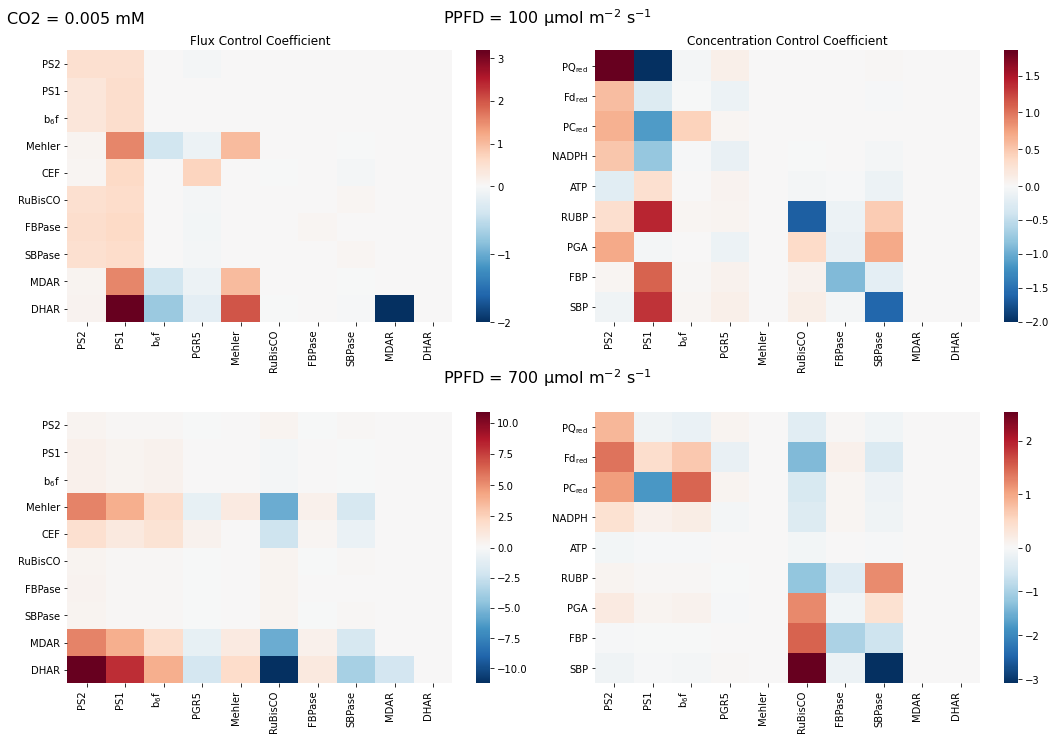

In [7]:
_ = plot_all_heatmaps(cll, fll, clh, flh, co2=LOW_CO2, low_light=LOW_LIGHT, high_light=HIGH_LIGHT)

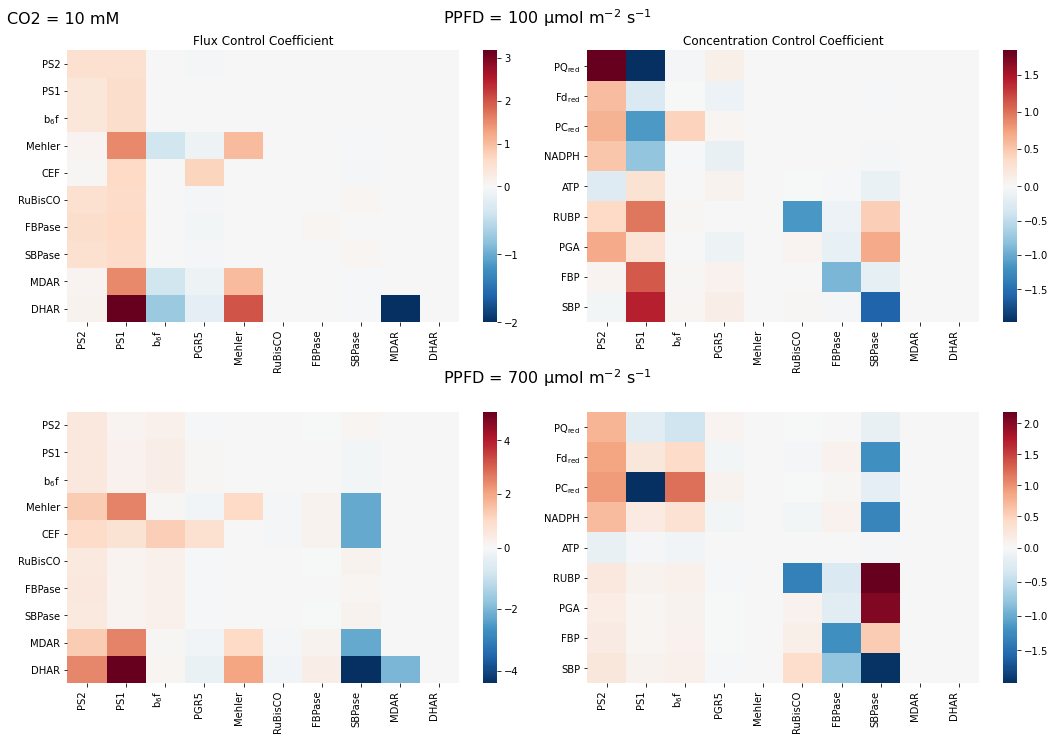

In [8]:
_ = plot_all_heatmaps(chl, fhl, chh, fhh, co2=HIGH_CO2, low_light=LOW_LIGHT, high_light=HIGH_LIGHT)

## Continuous search

- SBP / rubisco über CO2
- auch über mehrere pfd

In [ ]:
y0s

In [7]:
rb_cc = {}
rb_fc = {}

sbp_cc = {}
sbp_fc = {}

pfds = [100, 300, 400, 500, 700]

for pfd in pfds:
    for co2 in np.geomspace(0.005, 2, 10):
        m = get_model()
        m.update_parameter("CO2", co2)
        m.update_parameter("pfd", pfd)
        cc, fc = mca.get_response_coefficients(m, "V1_base", y0s[pfd])
        rb_cc.setdefault(pfd, {})[co2] = cc
        rb_fc.setdefault(pfd, {})[co2] = fc

        cc, fc = mca.get_response_coefficients(m, "V9_base", y0s[pfd])
        sbp_cc.setdefault(pfd, {})[co2] = cc
        sbp_fc.setdefault(pfd, {})[co2] = fc

rb_cc = pd.concat({k: pd.DataFrame(v, index=m.get_all_compounds(), dtype=float).T for k, v in rb_cc.items()})
rb_fc = pd.concat({k: pd.DataFrame(v, index=m.get_rate_names(), dtype=float).T for k, v in rb_fc.items()})

sbp_cc = pd.concat({k: pd.DataFrame(v, index=m.get_all_compounds(), dtype=float).T for k, v in sbp_cc.items()})
sbp_fc = pd.concat({k: pd.DataFrame(v, index=m.get_rate_names(), dtype=float).T for k, v in sbp_fc.items()})


In [27]:
j=list(RXNS)

['vPS2',
 'vPS1',
 'vB6f',
 'vMehler',
 'vCyc',
 'vRuBisCO',
 'vFBPase',
 'v9',
 'vMDAreduct',
 'vDHAR']

In [26]:
df = rb_fc.loc[:,list(RXNS)]
df.columns

Index(['vPS2', 'vPS1', 'vB6f', 'vMehler', 'vCyc', 'vRuBisCO', 'vFBPase', 'v9',
       'vMDAreduct', 'vDHAR'],
      dtype='object')

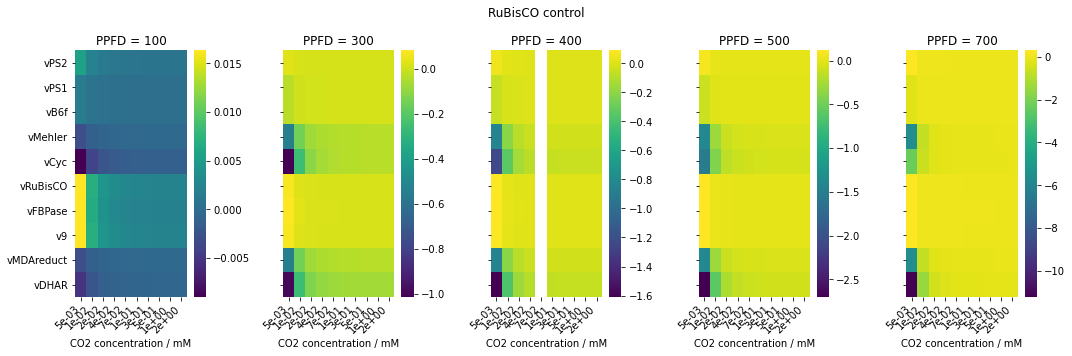

In [8]:
fig, axs = plt.subplots(1, len(pfds), figsize=(15, 5))
fig.suptitle("RuBisCO control")

for (ax, pfd) in zip(axs.flatten(), pfds):
    df = rb_fc.loc[pfd, list(RXNS)].T  # type: ignore
    df.columns = [format(k, ".0e") for k in df.columns]  # type: ignore
    _, ax, _ =heatmap_from_dataframe(df, "", annotate=False, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), **{"rotation": 45, "ha": "right"})
    ax.set_xlabel("CO2 concentration / mM")
    ax.set_title(f"PPFD = {pfd}")

for ax in axs.flatten()[1:]:
    ax.set_yticklabels([])
fig.tight_layout()

plt.show()

In [ ]:
fig, axs = plt.subplots(1, len(pfds), figsize=(15, 5))
fig.suptitle("SBPase control")

for (ax, pfd) in zip(axs.flatten(), pfds):
    df = sbp_fc.loc[pfd, list(RXNS)].T  # type: ignore
    df.columns = [format(k, ".0e") for k in df.columns]  # type: ignore
    _, ax, _ = heatmap_from_dataframe(df, "", annotate=False, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), **{"rotation": 45, "ha": "right"})
    ax.set_xlabel("CO2 concentration / mM")
    ax.set_title(f"PPFD = {pfd}")

for ax in axs.flatten()[1:]:
    ax.set_yticklabels([])
fig.tight_layout()

plt.show()

In [6]:
rb_cc = {}
rb_fc = {}

sbp_cc = {}
sbp_fc = {}

for co2 in np.geomspace(0.005, 2, 10):
    m = get_model()
    m.update_parameter("CO2", co2)
    cc, fc = mca.get_response_coefficients(m, "V1_base", y0s[HIGH_LIGHT])
    rb_cc.setdefault(1000, {})[co2] = cc
    rb_fc.setdefault(1000, {})[co2] = fc

    cc, fc = mca.get_response_coefficients(m, "V9_base", y0s[HIGH_LIGHT])
    sbp_cc.setdefault(1000, {})[co2] = cc
    sbp_fc.setdefault(1000, {})[co2] = fc

rb_cc = pd.concat({k: pd.DataFrame(v, index=m.get_all_compounds(), dtype=float).T for k, v in rb_cc.items()})
rb_fc = pd.concat({k: pd.DataFrame(v, index=m.get_rate_names(), dtype=float).T for k, v in rb_fc.items()})

sbp_cc = pd.concat({k: pd.DataFrame(v, index=m.get_all_compounds(), dtype=float).T for k, v in sbp_cc.items()})
sbp_fc = pd.concat({k: pd.DataFrame(v, index=m.get_rate_names(), dtype=float).T for k, v in sbp_fc.items()})


In [13]:
rb_fc

vPS2      vPS1     vPTOX      vNDH      vB6f      vCyc  \
1000 0.005000  0.005413  0.001532  0.007381 -0.004412  0.001532 -0.009008   
     0.009729  0.002279  0.000606  0.002912 -0.001746  0.000606 -0.003950   
     0.018932  0.001388  0.000360  0.001729 -0.001038  0.000360 -0.002443   
     0.036840  0.001040  0.000267  0.001280 -0.000768  0.000267 -0.001842   
     0.071687  0.000883  0.000225  0.001080 -0.000649  0.000225 -0.001569   
     0.139495  0.000807  0.000206  0.000985 -0.000592  0.000206 -0.001437   
     0.271442  0.000770  0.000196  0.000938 -0.000564  0.000196 -0.001372   
     0.528195  0.000751  0.000191  0.000914 -0.000549  0.000191 -0.001339   
     1.027809  0.000741  0.000188  0.000902 -0.000542  0.000188 -0.001322   
     2.000000  0.000736  0.000187  0.000896 -0.000538  0.000187 -0.001313   

                  vNDH1      vFNR     vLeak     vSt12  ...  vMDAreduct  \
1000 0.005000 -0.008532  0.005458 -0.056091  0.006408  ...   -0.003043   
     0.009729 -0.003766  0.002302 -0.022966  0.002535  ...   -0.001339   
     0.018932 -0.002334  0.001403 -0.013852  0.001506  ...   -0.000829   
     0.036840 -0.001761  0.001051 -0.010328  0.001115  ...   -0.000625   
     0.071687 -0.001501  0.000892 -0.008751  0.000941  ...   -0.000533   
     0.139495 -0.001375  0.000816 -0.007995  0.000859  ...   -0.000488   
     0.271442 -0.001313  0.000778 -0.007620  0.000818  ...   -0.000466   
     0.528195 -0.001281  0.000759 -0.007431  0.000797  ...   -0.000455   
     1.027809 -0.001265  0.000750 -0.007335  0.000787  ...   -0.000449   
     2.000000 -0.001257  0.000745 -0.007285  0.000781  ...   -0.000446   

                vMehler       vGR     vDHAR     v3ASC   vEX_ATP  vEX_NADPH  \
1000 0.005000 -0.003043 -0.005212 -0.005212 -0.005212 -0.037524  -0.007078   
     0.009729 -0.001339 -0.002283 -0.002283 -0.002283 -0.016252  -0.003189   
     0.018932 -0.000829 -0.001412 -0.001412 -0.001412 -0.010003  -0.001991   
     0.036840 -0.000625 -0.001064 -0.001064 -0.001064 -0.007524  -0.001508   
     0.071687 -0.000533 -0.000907 -0.000907 -0.000907 -0.006402  -0.001287   
     0.139495 -0.000488 -0.000830 -0.000830 -0.000830 -0.005861  -0.001180   
     0.271442 -0.000466 -0.000792 -0.000792 -0.000793 -0.005592  -0.001127   
     0.528195 -0.000455 -0.000773 -0.000773 -0.000773 -0.005456  -0.001100   
     1.027809 -0.000449 -0.000764 -0.000764 -0.000764 -0.005387  -0.001086   
     2.000000 -0.000446 -0.000759 -0.000759 -0.000759 -0.005352  -0.001079   

               vFdTrReductase  vE_activation  vE_inactivation  
1000 0.005000       -0.002181      -0.002181        -0.002181  
     0.009729       -0.001046      -0.001046        -0.001046  
     0.018932       -0.000667      -0.000667        -0.000667  
     0.036840       -0.000510      -0.000510        -0.000510  
     0.071687       -0.000437      -0.000437        -0.000437  
     0.139495       -0.000401      -0.000401        -0.000401  
     0.271442       -0.000384      -0.000384        -0.000384  
     0.528195       -0.000375      -0.000375        -0.000375  
     1.027809       -0.000370      -0.000370        -0.000370  
     2.000000       -0.000368      -0.000368        -0.000368  

[10 rows x 47 columns]

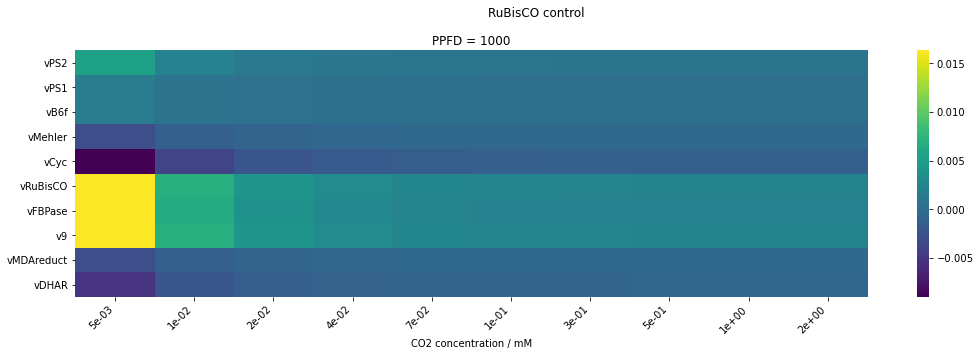

In [12]:
fig, ax= plt.subplots(1, 1, figsize=(15, 5))
fig.suptitle("RuBisCO control")

#    ax, pfd in zip(axs.flatten(), pfds):
df = rb_fc.loc[1000, list(RXNS)].T  # type: ignore
df.columns = [format(k, ".0e") for k in df.columns]  # type: ignore
_, ax, _ =heatmap_from_dataframe(df, "", annotate=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), **{"rotation": 45, "ha": "right"})
ax.set_xlabel("CO2 concentration / mM")
ax.set_title(f"PPFD = 1000")

for ax in axs.flatten()[1:]:
    ax.set_yticklabels([])
fig.tight_layout()

plt.show()